In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [3]:
def pre_processing(file_name):
    acce_result = []
    gyro_result = []
    filter_result = []
    with open(file_name, 'r') as input_file:
        for line in input_file.readlines():
            parsed = line.strip().split(' ')
            if parsed[0] == 'Gyro:':
                gyro_result.append([float(i) for i in parsed[1:]])
            elif parsed[0] == 'Acce:':
                acce_result.append([float(i) for i in parsed[1:]])
            elif parsed[0] == 'Comp:':
                filter_result.append([float(i) for i in parsed[1:]])
            else:
                print('cannot parse ' + line)
    return np.array(acce_result), np.array(gyro_result), np.array(filter_result)

def plot_tilt(all_data, data_labels, zoom_in=False):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    for i in range(3):
        axes[0].plot(all_data[i][:,0], label = data_labels[i])
    axes[0].legend()
    if zoom_in:
        axes[0].set_ylim(0, 5)
    axes[0].set_title('{} x-axis'.format('tilt'))
    axes[0].set_xlabel('samples')
    axes[0].set_ylabel('angle (degree)')

    for i in range(3):
        axes[1].plot(all_data[i][:,1], label=data_labels[i])
    axes[1].legend()
    if zoom_in:
        axes[1].set_ylim(0, 5)
    axes[1].set_title('{} y-axis'.format('tilt'))
    axes[1].set_xlabel('samples')
    axes[1].set_ylabel('angle (degree)')

    fig.tight_layout()

In [4]:
acce_data, gyro_data, filter_result = pre_processing('part_2_5_min.txt')

cannot parse Accelerometer and gyro output



In [5]:
acce_data[0, :]

array([0.04583726, 0.33055897])

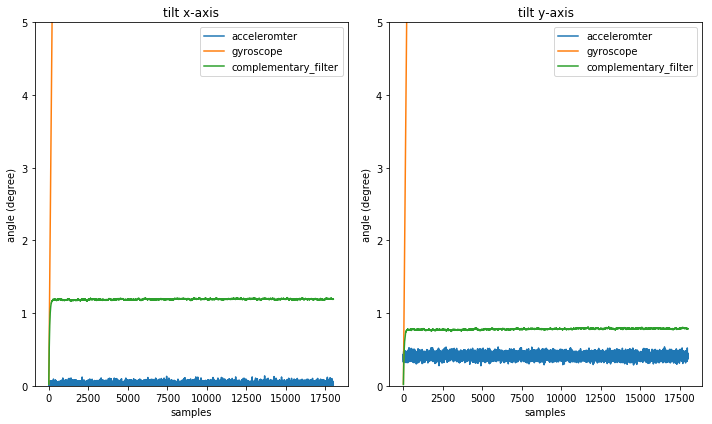

In [6]:
plot_tilt((acce_data, gyro_data, filter_result), ['acceleromter', 'gyroscope', 'complementary_filter'], zoom_in=True)
plt.savefig('tilt_5_min_zoomed_in.png')

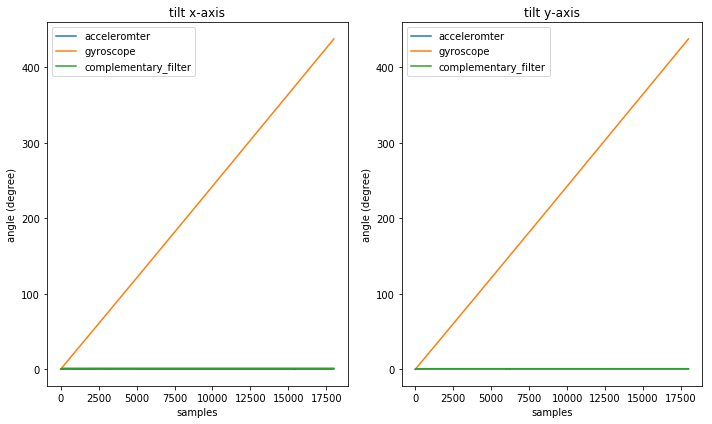

In [7]:
plot_tilt((acce_data, gyro_data, filter_result), ['acceleromter', 'gyroscope', 'complementary_filter'])
plt.savefig('tilt_5_min_unzoom.png')

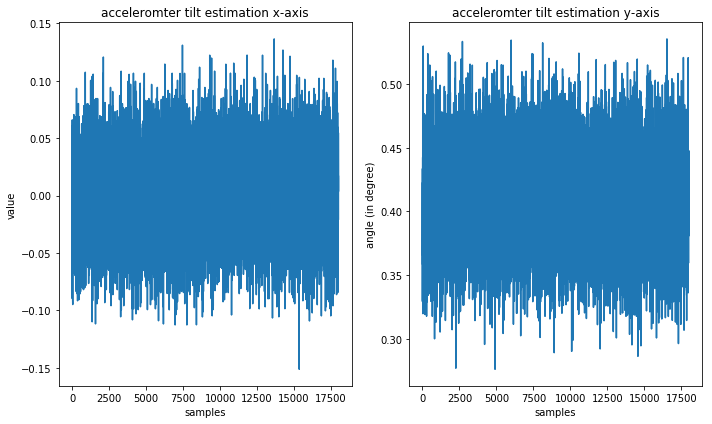

In [32]:
plot_tilt(acce_data, 'acceleromter tilt estimation')

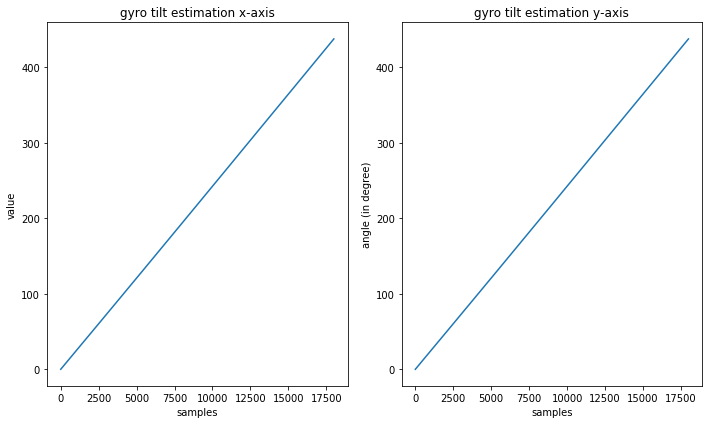

In [33]:
plot_tilt(gyro_data, 'gyro tilt estimation')

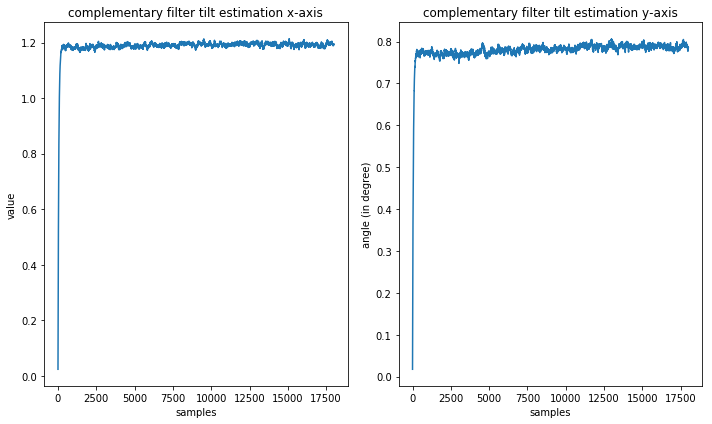

In [34]:
plot_tilt(filter_result, 'complementary filter tilt estimation')